# Import libraries

In [1]:

import fitz  # PyMuPDF
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np


# Specify the path to your PDF
# File available at : https://www.canlii.org/en/ca/scc/doc/2006/2006scc25/2006scc25.pdf
pdf_path = 'input_files/Leskun.pdf'

# Extract one page to confirm the dual-column structure

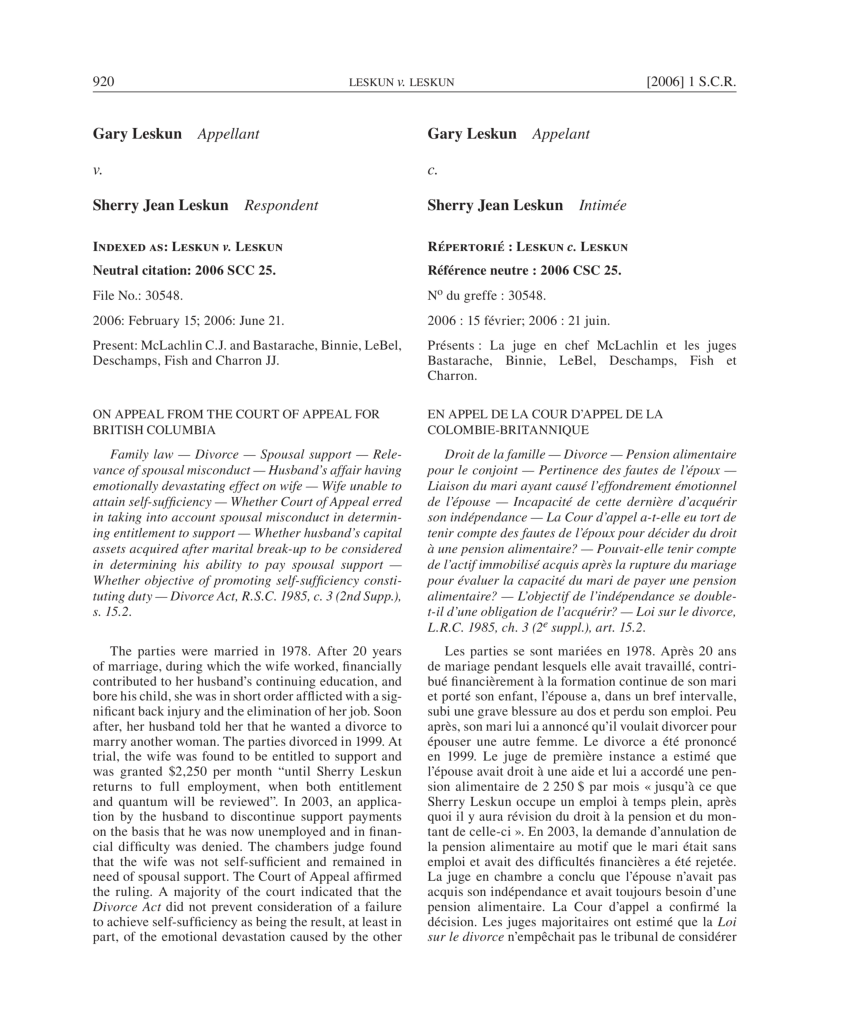

In [2]:

def display_sample_page(pdf_path, page_num):
    """Displays a sample page from a PDF as an RGB image."""
   
    doc = fitz.open(pdf_path)
    
    # Select the specific page
    page = doc.load_page(page_num)
    
    # Render the page to a pixmap (an image) at 300 DPI in RGB
    pix = page.get_pixmap(matrix=fitz.Matrix(300/72, 300/72))
    
    # Convert the pixmap to a numpy array
    img = np.frombuffer(pix.samples, dtype=np.uint8).reshape(pix.height, pix.width, 3)
    
    # Close the document
    doc.close()
    
    # Display the image using matplotlib
    plt.figure(figsize=(15, 20))
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

# Display the first page of the PDF as a sample
display_sample_page(pdf_path, 0)



# Confirm the splitting strategy works

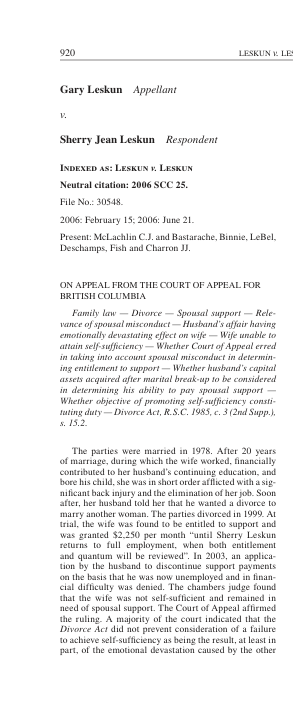

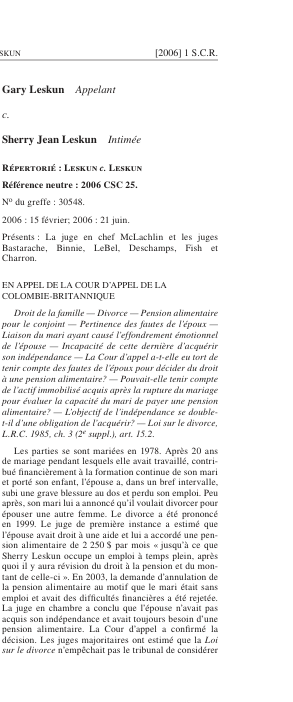

In [3]:
# In this section we split the document and display different part separately

def split_page_into_columns(pdf_path, page_num):
  
    doc = fitz.open(pdf_path)
    page = doc[page_num]

    # Define rectangles for English and French columns. Coordinate might need to be adjusted
    english_rect = fitz.Rect(0, 0, page.rect.width / 2, page.rect.height)
    french_rect = fitz.Rect(page.rect.width / 2, 0, page.rect.width, page.rect.height)

    english_pix = page.get_pixmap(clip=english_rect)
    french_pix = page.get_pixmap(clip=french_rect)

    # Convert Pixmap to PIL Image for display
    english_img = Image.frombytes("RGB", [english_pix.width, english_pix.height], english_pix.samples)
    french_img = Image.frombytes("RGB", [french_pix.width, french_pix.height], french_pix.samples)

    display(english_img)  # Display English column
    display(french_img)  # Display French column

    doc.close()

    
split_page_into_columns(pdf_path, 0)


# Iterate through each page, and then extract text from defined regions

In [4]:

def extract_columns_from_pdf(pdf_path):   
    doc = fitz.open(pdf_path)
    
    # Initialize containers for text from each column
    english_texts = []
    french_texts = []
    
    for page in doc:
        english_rect = fitz.Rect(0, 0, page.rect.width / 2, page.rect.height)        
        french_rect = fitz.Rect(page.rect.width / 2, 0, page.rect.width, page.rect.height)

        english_text = page.get_textbox(english_rect)
        french_text = page.get_textbox(french_rect)
        
        english_texts.append(english_text)
        french_texts.append(french_text)
    
    doc.close()
    return english_texts, french_texts


# Extract text from each column
english_texts, french_texts = extract_columns_from_pdf(pdf_path)

# Example: print texts from the first page (or any specific page)
print("ENGLISH TEXTt:\n", english_texts[0])
print('')
print("FRENCH TEXT:\n", french_texts[0])

ENGLISH TEXTt:
 920
LeSkuN v. LeS
Gary Leskun Appellant
v.
Sherry Jean Leskun Respondent
Indexed as: Leskun v. Leskun
Neutral citation: 2006 SCC 25.
File No.: 30548.
2006: February 15; 2006: June 21.
Present: McLachlin C.J. and Bastarache, Binnie, LeBel, 
Deschamps, Fish and Charron JJ.
ON APPEAL FROM THE COURT OF APPEAL FOR 
BRITISH COLUMBIA
 
Family law — Divorce — Spousal support — Rele-
vance of spousal misconduct — Husband’s affair having 
emotionally devastating effect on wife — Wife unable to 
attain self-sufficiency — Whether Court of Appeal erred 
in taking into account spousal misconduct in determin-
ing entitlement to support — Whether husband’s capital 
assets acquired after marital break-up to be considered 
in determining his ability to pay spousal support — 
Whether objective of promoting self-sufficiency consti-
tuting duty — Divorce Act, R.S.C. 1985, c. 3 (2nd Supp.), 
s. 15.2.
 
The parties were married in 1978. After 20 years 
of marriage, during which the wife worke